# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:Â https://www.kaggle.com/raghadalharbi/all-products-available-on-sephora-website

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

sephora_df = pd.read_csv("sephora-dataset.csv")

print(sephora_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5039 entries, 0 to 5038
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5039 non-null   int64  
 1   Unnamed: 0.1        5039 non-null   int64  
 2   id                  5039 non-null   int64  
 3   brand               5039 non-null   object 
 4   category            5039 non-null   object 
 5   name                5039 non-null   object 
 6   size                5039 non-null   object 
 7   rating              5039 non-null   float64
 8   number_of_reviews   5039 non-null   int64  
 9   love                5039 non-null   int64  
 10  price               5039 non-null   float64
 11  value_price         5039 non-null   float64
 12  options             5039 non-null   object 
 13  online_only         5039 non-null   int64  
 14  exclusive           5039 non-null   int64  
 15  limited_edition     5039 non-null   int64  
 16  limite

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

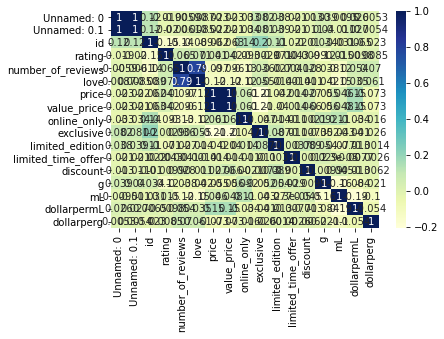

In [8]:
sb.heatmap(sephora_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [9]:
X = sephora_df['number_of_reviews']
y = sephora_df['love']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   love   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     6219.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        09:50:45   Log-Likelihood:                -41203.
No. Observations:                3527   AIC:                         8.241e+04
Df Residuals:                    3525   BIC:                         8.242e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4891.2666    503.053      9.723      0.000    3904.962    5877.571
number_of_reviews    39.5907      0.502     78.859      0.000      38.606      40.575
==============================================================================
Omnibus:                     4673.296   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4404647.056
Skew:                           6.768   Prob(JB):                         0.00
Kurtosis:                     175.594   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

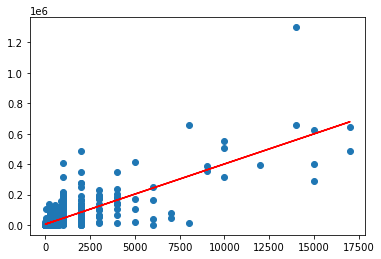

In [10]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 4891.2666 + 39.5907*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

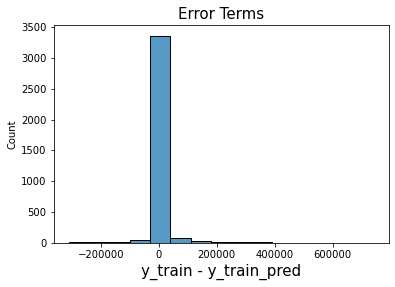

In [11]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

fig = plt.figure()
sb.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.638
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not really